<a href="https://colab.research.google.com/github/enesergen/ML-Fundamentals/blob/main/ML_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#import pandas lib
import pandas as pd
#dataset url
url="https://raw.githubusercontent.com/tansutosun/MachineLearning/main/dungaree.csv";
#read dataset from github csv
df=pd.read_csv(url)

In [41]:
#Deleting ID Column
deleting_column_name='STOREID'
if deleting_column_name in df.keys():
  del df[deleting_column_name]

In [42]:
#Deleting ID Column
deleting_column_name='SALESTOT'
if deleting_column_name in df.keys():
  del df[deleting_column_name]

In [43]:
df

,FASHION,LEISURE,STRETCH,ORIGINAL
0,182,1528,496,2203
1,129,2247,296,1890
2,107,1652,267,2342
3,117,1744,419,2119
4,110,1736,755,1781
...,...,...,...,...
684,62,1526,871,1956
685,57,1564,8,1769
686,104,1963,274,2053
687,51,2057,393,1901


In [44]:
#Z-score lib
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler=StandardScaler();
# Fit the scaler to  data
scaler.fit(df)
# Transform  data
normalized_data=scaler.transform(df)

#view transformed data
normalized_data

array([[ 2.75330253, -1.10791719,  0.24562839,  1.21352058],
       [ 1.12716676,  0.94293908, -0.69983508,  0.13938196],
       [ 0.45216701, -0.75422293, -0.83692728,  1.69053422],
       ...,
       [ 0.36012159,  0.13286511, -0.80383606,  0.69875766],
       [-1.26601418,  0.40098819, -0.2412853 ,  0.17713124],
       [ 0.14534894,  0.39243107,  0.26926498, -0.08025022]])

In [45]:
#import kmeans
from sklearn.cluster import KMeans
#How many cluster does it divide
kmeans=KMeans(n_clusters=6,random_state=42)
#fitting the KMeans Model
kmeans.fit(normalized_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [46]:
#predicted cluster output from input dataframe
labels=kmeans.predict(normalized_data)
labels

array([3, 3, 4, 4, 2, 2, 1, 1, 4, 4, 0, 4, 1, 5, 1, 0, 3, 4, 2, 3, 1, 1,
       1, 3, 2, 2, 1, 2, 4, 4, 1, 4, 4, 4, 1, 1, 2, 0, 4, 3, 2, 2, 3, 2,
       1, 2, 0, 3, 4, 1, 1, 2, 4, 3, 3, 3, 4, 3, 2, 2, 1, 5, 2, 1, 4, 3,
       2, 2, 4, 5, 2, 1, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 4, 1, 4, 1, 1,
       0, 1, 2, 1, 5, 1, 0, 1, 3, 2, 4, 3, 3, 0, 2, 4, 2, 1, 3, 0, 2, 4,
       1, 4, 2, 4, 0, 1, 1, 1, 0, 3, 0, 0, 2, 3, 2, 0, 4, 1, 1, 1, 1, 3,
       4, 4, 4, 4, 2, 2, 4, 1, 1, 4, 3, 4, 2, 2, 4, 4, 4, 3, 1, 0, 4, 1,
       3, 2, 4, 4, 3, 0, 1, 4, 1, 1, 3, 1, 1, 3, 4, 4, 1, 2, 2, 1, 4, 5,
       4, 4, 4, 3, 4, 4, 1, 1, 2, 2, 3, 0, 1, 4, 3, 3, 4, 2, 4, 4, 2, 0,
       4, 3, 1, 2, 3, 3, 1, 2, 1, 3, 4, 1, 1, 1, 3, 1, 2, 0, 4, 1, 4, 2,
       4, 3, 1, 4, 1, 0, 3, 2, 2, 1, 1, 3, 1, 3, 4, 2, 3, 4, 2, 3, 1, 1,
       0, 1, 2, 4, 2, 4, 1, 3, 2, 0, 4, 1, 1, 0, 3, 4, 4, 1, 1, 1, 2, 4,
       1, 4, 0, 4, 1, 1, 3, 2, 3, 4, 0, 2, 4, 2, 0, 3, 1, 1, 4, 1, 4, 3,
       3, 0, 3, 5, 4, 1, 4, 4, 3, 4, 4, 0, 4, 0, 2,

In [47]:
#convert array to
labels_data_frame=pd.DataFrame(labels,columns=["CLUSTER"])
labels_data_frame

,CLUSTER
0,3
1,3
2,4
3,4
4,2
...,...
684,2
685,0
686,4
687,4


In [48]:
#merge dataframe with cluster label
merged_data=pd.merge(df,labels_data_frame,left_index=True,right_index=True)
merged_data

,FASHION,LEISURE,STRETCH,ORIGINAL,CLUSTER
0,182,1528,496,2203,3
1,129,2247,296,1890,3
2,107,1652,267,2342,4
3,117,1744,419,2119,4
4,110,1736,755,1781,2
...,...,...,...,...,...
684,62,1526,871,1956,2
685,57,1564,8,1769,0
686,104,1963,274,2053,4
687,51,2057,393,1901,4


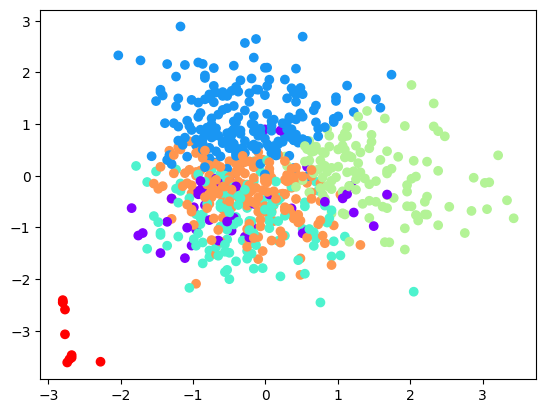

In [49]:
#import pyplot
import matplotlib.pyplot as plt

#showing the clusters
plt.scatter(normalized_data[:,0],normalized_data[:,1],c=kmeans.labels_,cmap='rainbow')